(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
11250 train samples
3750 validation samples 

Shape of x_train (11250, 3072)
Shape of x_test (3000, 3072)
Shape of x_val (3750, 3072)

Shape of y_train (11250, 3)
Shape of y_test (3000, 3)
Shape of y_val (3750, 3)



Train on 11250 samples, validate on 3750 samples
Epoch 1/24
11250/11250 [==============================] - 2s 191us/step - loss: 0.9199 - accuracy: 0.5608 - val_loss: 0.7564 - val_accuracy: 0.6789
Epoch 2/24
11250/11250 [==============================] - 2s 172us/step - loss: 0.7697 - accuracy: 0.6708 - val_loss: 0.6914 - val_accuracy: 0.7120
Epoch 3/24
11250/11250 [==============================] - 2s 174us/step - loss: 0.7085 - accuracy: 0.7038 - val_loss: 0.6876 - val_accuracy: 0.7141
Epoch 4/24
11250/11250 [==============================] - 2s 182us/step - loss: 0.6797 - accuracy: 0.7220 - val_loss: 0.6254 - val_accuracy: 0.7507
Epoch 5/24
11250/11250 [==============================] - 2s 184us/step - loss: 0.

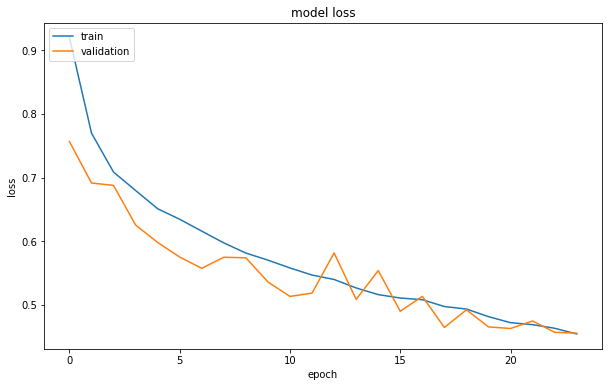

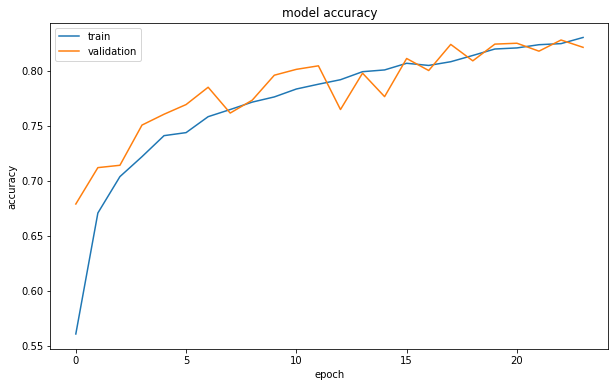

Train on 11250 samples, validate on 3750 samples
Epoch 1/24
11250/11250 [==============================] - 2s 194us/step - loss: 0.9081 - accuracy: 0.5719 - val_loss: 0.7602 - val_accuracy: 0.6856
Epoch 2/24
11250/11250 [==============================] - 2s 178us/step - loss: 0.7598 - accuracy: 0.6773 - val_loss: 0.6790 - val_accuracy: 0.7224
Epoch 3/24
11250/11250 [==============================] - 2s 181us/step - loss: 0.7075 - accuracy: 0.7093 - val_loss: 0.6420 - val_accuracy: 0.7397
Epoch 4/24
11250/11250 [==============================] - 2s 187us/step - loss: 0.6691 - accuracy: 0.7252 - val_loss: 0.6251 - val_accuracy: 0.7357
Epoch 5/24
11250/11250 [==============================] - 2s 182us/step - loss: 0.6461 - accuracy: 0.7404 - val_loss: 0.6066 - val_accuracy: 0.7501
Epoch 6/24
11250/11250 [==============================] - 2s 175us/step - loss: 0.6279 - accuracy: 0.7477 - val_loss: 0.5707 - val_accuracy: 0.7728
Epoch 7/24
11250/11250 [==============================] - 2s 17

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 17 13:37:07 2020

@author: vatsal
"""

import numpy as np
from keras.datasets import cifar10  
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.models import load_model

#Loading the Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Shape of training Data
print(x_train.shape)
print(y_train.shape)

#Shape of testing Data
print(x_test.shape)
print(y_test.shape)

#Extracting the subset of 3 classes(Automobile, horse, ship) from the cifar10 Dataset
def subset(subset_labels):
  arr = []
  for index,label in enumerate(subset_labels):
    if label in [1,7,8]:
      arr.append(index)
  return arr

#Assigning the extracted index to the subset of data matching the index
train_index = subset(y_train)
test_index = subset(y_test)

#Shape of new training data
x_train = x_train[train_index]
y_train = y_train[train_index]

#Shape of new testing data
x_test = x_test[test_index]
y_test = y_test[test_index]


#Converting extracted labels 1,7,8 to 0,1,2  
def label_convert(new_labels):
  for index,value in enumerate(new_labels):
    if value == 1:
      new_labels[index] = 0
    elif value == 7:
      new_labels[index] = 1
    else:
      new_labels[index] = 2
  return new_labels

y_train = label_convert(y_train)
y_test = label_convert(y_test) 

#Split Test set into testing data and validation data
x_train,x_val, y_train,y_val = train_test_split(x_train,y_train , test_size = 0.25, random_state = 1)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples \n')

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
x_train = np.reshape(x_train,(x_train.shape[0],3072))
x_val = np.reshape(x_val, (x_val.shape[0], 3072))
x_test = np.reshape(x_test,(x_test.shape[0],3072))
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# Normalization of pixel values (to [0-1] range)
x_train /= 255
x_val /=255
x_test /= 255

#Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print("Shape of x_train", x_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of x_val", x_val.shape)
print("\nShape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)
print("Shape of y_val", y_val.shape)
print("\n")
    
#Creating fully connected Artificail Neural Network
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
history = model.fit(x_train, y_train, batch_size=64, epochs=24, validation_data =(x_val,y_val))

def plotloss(history):  
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotloss(history)

def plotaccuracy(history):  
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotaccuracy(history)    

#Saving the model with paramteres
model.save('task_1.h5')
model = load_model('task_1.h5')

#Retraining the model
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
history = model.fit(x_train, y_train, batch_size=64, epochs=24, validation_data =(x_val,y_val))

#Retraining the model with the test set
result = model.evaluate(x=x_test,y=y_test)
print("Accuracy: {}".format(result[1]*100),2)
